In [1]:
#This program generates the bar plot in Supplementary fig. 'Inhibition off'
#Bar plot: Mean firing rates for the population in the case of spontanoues activity
#comparison with when inhibition is off (inhibitory neurons not able to ihibit the rest)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

In [3]:
#Importing some info I need 
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [4]:
#FUNCTION TO IMPORT THE FILES
def take_files(a): #a is the folder containing th info
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [5]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups (I record from all)
#------------------------------------------------------------------------------
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    #print(runtime)
    
    #Total number of spikes and rate for each group
    
    #Layer 1
    tot_sp_vip1 =  S_vip1num_spikes  
    rate_vip1= tot_sp_vip1/(N1*runtime)

    #Layer 2/3
    tot_sp_e23 =  S_e23num_spikes
    #print(tot_sp_e23)
    #print(N[0][0])
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)

    #Layer 4
    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)
    
    #Layer 5
    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)
    
    #Layer 6
    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6,rate_vip1

In [7]:
#I IMPORT THE FILES WHERE NO INPUT WAS GIVEN, SPONTANEUOUS ACTIVITY
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files('simulations_data/SPONT_runs/i1/Sp_1')

#compute the FR with the function previously defined 
rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0,rate_vip1_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

#I put them all in one array
rates=[rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0]

-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.798611
rate_e23: 0.278587 rate_pv23: 2.846154 rate_sst23: 3.191489 rate_vip23: 7.442368
rate_e4: 1.123102 rate_pv4: 3.846939 rate_sst4: 1.716981 rate_vip4: 1.222222
rate_e5: 2.112461 rate_pv5: 4.719577 rate_sst5: 3.500000 rate_vip5: 6.272727
rate_e6: 0.902877 rate_pv6: 4.575163 rate_sst6: 6.248366 rate_vip6: 3.105263


In [8]:
#I IMPORT THE FILES WHERE NO INHIBITION
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files('simulations_data/Sp_inhOFF')

#compute the FR  
rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0,rate_vip1_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

#Put them all in one array
rates_inhOFF=[rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0]

-----------------------Computing the firing rates--------------------------------
rate_vip1: 13.875000
rate_e23: 15.094930 rate_pv23: 62.969231 rate_sst23: 29.276596 rate_vip23: 71.448598
rate_e4: 19.829043 rate_pv4: 57.870748 rate_sst4: 18.628931 rate_vip4: 45.296296
rate_e5: 25.946919 rate_pv5: 87.380952 rate_sst5: 45.101190 rate_vip5: 66.909091
rate_e6: 27.640274 rate_pv6: 120.071895 rate_sst6: 21.281046 rate_vip6: 44.877193


In [9]:
#Plot results

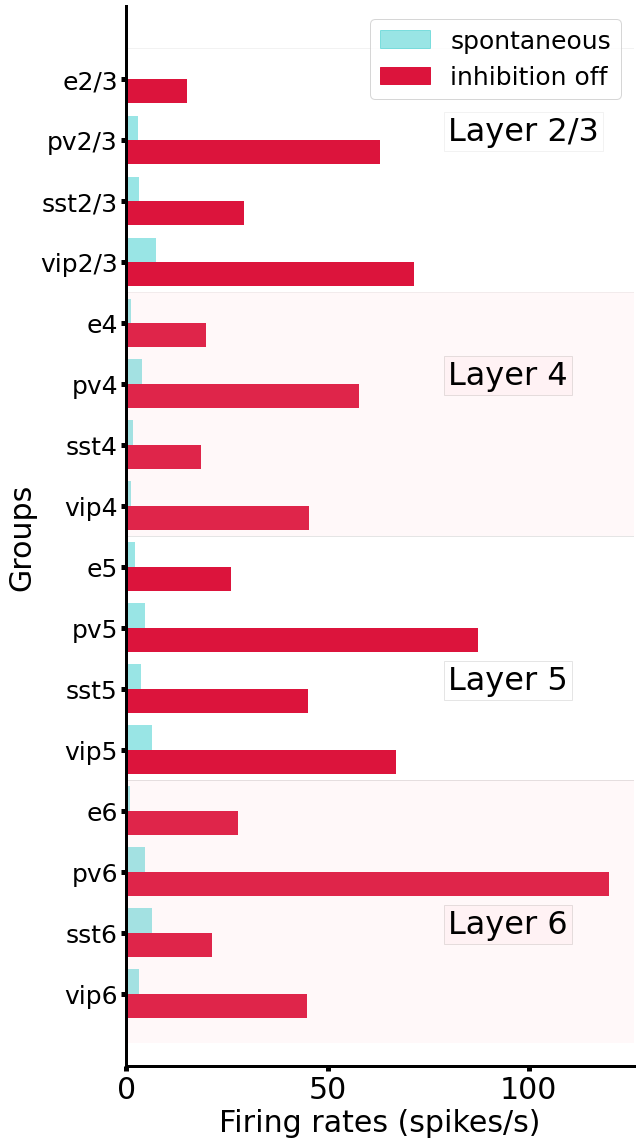

In [10]:
#data to plot
base_fr= list(reversed(rates))
inhOFF_fr=list(reversed(rates_inhOFF))



#Create the figure
f, ax1 = plt.subplots(figsize=(9,16))

labels = ['vip6','sst6','pv6', 'e6','vip5','sst5','pv5', 'e5','vip4','sst4','pv4', 'e4','vip2/3','sst2/3','pv2/3', 'e2/3']

y = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects2_23 = ax1.barh(y + width/2, base_fr, width,color='c',alpha=0.4,label='spontaneous')
rects1_23 = ax1.barh(y - width/2, inhOFF_fr, width, color='crimson',alpha=1,label='inhibition off')

#Layout
plt.setp(ax1.spines.values(), linewidth=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Add some text for labels, custom axis tick labels, etc.
ax1.set_xlabel('Firing rates (spikes/s)', fontsize=30)
ax1.set_ylabel('Groups', fontsize=30)
plt.xticks(size=30)
ax1.xaxis.set_tick_params(width=5,length=5)
ax1.yaxis.set_tick_params(width=5,length=5)
plt.locator_params(axis='x', nbins=5)
ax1.set_yticks(y)
ax1.set_yticklabels(labels, fontsize=25)
#Legend
ax1.legend(loc="upper right", fontsize=25)
#Customize legend
leg = ax1.get_legend()
leg.legendHandles[0].set_color('c')
leg.legendHandles[1].set_color('crimson')

#Boxes for layers
rect6=mpatches.Rectangle((0,-0.8),130,4.3, #16 e' la larghezza, 4.3 altezza, le coordinate la posiz dell'angolo
                    #fill = False,
                        alpha=0.1,
                   facecolor="pink",
                    #color = "black",
                    linewidth = 1)

rect5=mpatches.Rectangle((0,3.5),130,4, 
                    fill = False,
                        alpha=0.1,
                   #facecolor="grey",
                    color = "black",
                    linewidth = 1)

rect4=mpatches.Rectangle((0,7.5),130,4, 
                    #fill = False,
                        alpha=0.1,
                   facecolor="pink",
                    #color = "red",
                    linewidth = 1)


rect23=mpatches.Rectangle((0,11.5),130,4, 
                fill = False,
                    alpha=0.1,
               #facecolor="grey",
                color = "grey",
                linewidth = 1)

plt.gca().add_patch(rect6)
plt.gca().add_patch(rect5)
plt.gca().add_patch(rect4)
plt.gca().add_patch(rect23)

#Boxes for layers
ax1.text(80,1 ,'Layer 6', fontsize = 32, 
     bbox = dict(facecolor = 'pink', alpha = 0.1))
ax1.text(80,5 ,'Layer 5', fontsize = 32, 
     bbox = dict(facecolor = 'white', alpha = 0.1))
ax1.text(80,10 ,'Layer 4', fontsize = 32, 
     bbox = dict(facecolor = 'pink', alpha = 0.1))
ax1.text(80,14 ,'Layer 2/3', fontsize = 32, 
     bbox = dict(edgecolor="grey",facecolor = 'white', alpha = 0.1))

f.tight_layout()

#Save fig 
plt.savefig('IMAGES/Fig2_SUPP_inhOff.png',bbox_inches='tight')
plt.show()